<a href="https://colab.research.google.com/github/gfernandesdev/VisualizacaoDados2023_1/blob/main/Atv1_VisualizacaoDadosInfo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**QUESTÃO 1**

In [1]:
import pandas as pd

In [3]:
vendas = pd.read_csv('/content/VIS_Pr_01_Vendas.csv',encoding='latin1')

In [4]:
vendas.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
vendas_q1 = vendas.filter(items=['Sales', 'Profit', 'Region','Discount'])

In [6]:
vendas_q1

,Sales,Profit,Region,Discount
0,261.9600,41.9136,South,0.00
1,731.9400,219.5820,South,0.00
2,14.6200,6.8714,West,0.00
3,957.5775,-383.0310,South,0.45
4,22.3680,2.5164,South,0.20
...,...,...,...,...
9989,25.2480,4.1028,South,0.20
9990,91.9600,15.6332,West,0.00
9991,258.5760,19.3932,West,0.20
9992,29.6000,13.3200,West,0.00


In [7]:
vendas_q1.groupby('Region').agg({'Sales':'sum','Profit':'sum','Discount':'mean'})

,Sales,Profit,Discount
Region,,,
Central,501239.8908,39706.3625,0.240353
East,678781.2400,91522.7800,0.145365
South,391721.9050,46749.4303,0.147253
West,725457.8245,108418.4489,0.109335


**QUESTÃO 2**



In [106]:
vendas_q2 = vendas.filter(items=['Profit','Order Date','Sub-Category'])

In [107]:
vendas_q2

,Profit,Order Date,Sub-Category
0,41.9136,11/8/2016,Bookcases
1,219.5820,11/8/2016,Chairs
2,6.8714,6/12/2016,Labels
3,-383.0310,10/11/2015,Tables
4,2.5164,10/11/2015,Storage
...,...,...,...
9989,4.1028,1/21/2014,Furnishings
9990,15.6332,2/26/2017,Furnishings
9991,19.3932,2/26/2017,Phones
9992,13.3200,2/26/2017,Paper


In [108]:
date = vendas_q2['Order Date'].str.split("/", expand = True)

In [109]:
date[2]

0       2016
1       2016
2       2016
3       2015
4       2015
        ... 
9989    2014
9990    2017
9991    2017
9992    2017
9993    2017
Name: 2, Length: 9994, dtype: object

In [110]:
vendas_q2 = vendas_q2.join(date)

In [111]:
vendas_q2 = vendas_q2.rename(columns={2: 'Year'})

In [112]:
vendas_q2 = vendas_q2.filter(items=['Sub-Category','Profit','Year'])

In [113]:
vendas_q2

,Sub-Category,Profit,Year
0,Bookcases,41.9136,2016
1,Chairs,219.5820,2016
2,Labels,6.8714,2016
3,Tables,-383.0310,2015
4,Storage,2.5164,2015
...,...,...,...
9989,Furnishings,4.1028,2014
9990,Furnishings,15.6332,2017
9991,Phones,19.3932,2017
9992,Paper,13.3200,2017


In [146]:
vendas_q2 = vendas_q2.groupby(by=['Sub-Category','Year']).sum().sort_values(by='Profit', ascending=False)

In [147]:
vendas_q2 = vendas_q2.reset_index()

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt

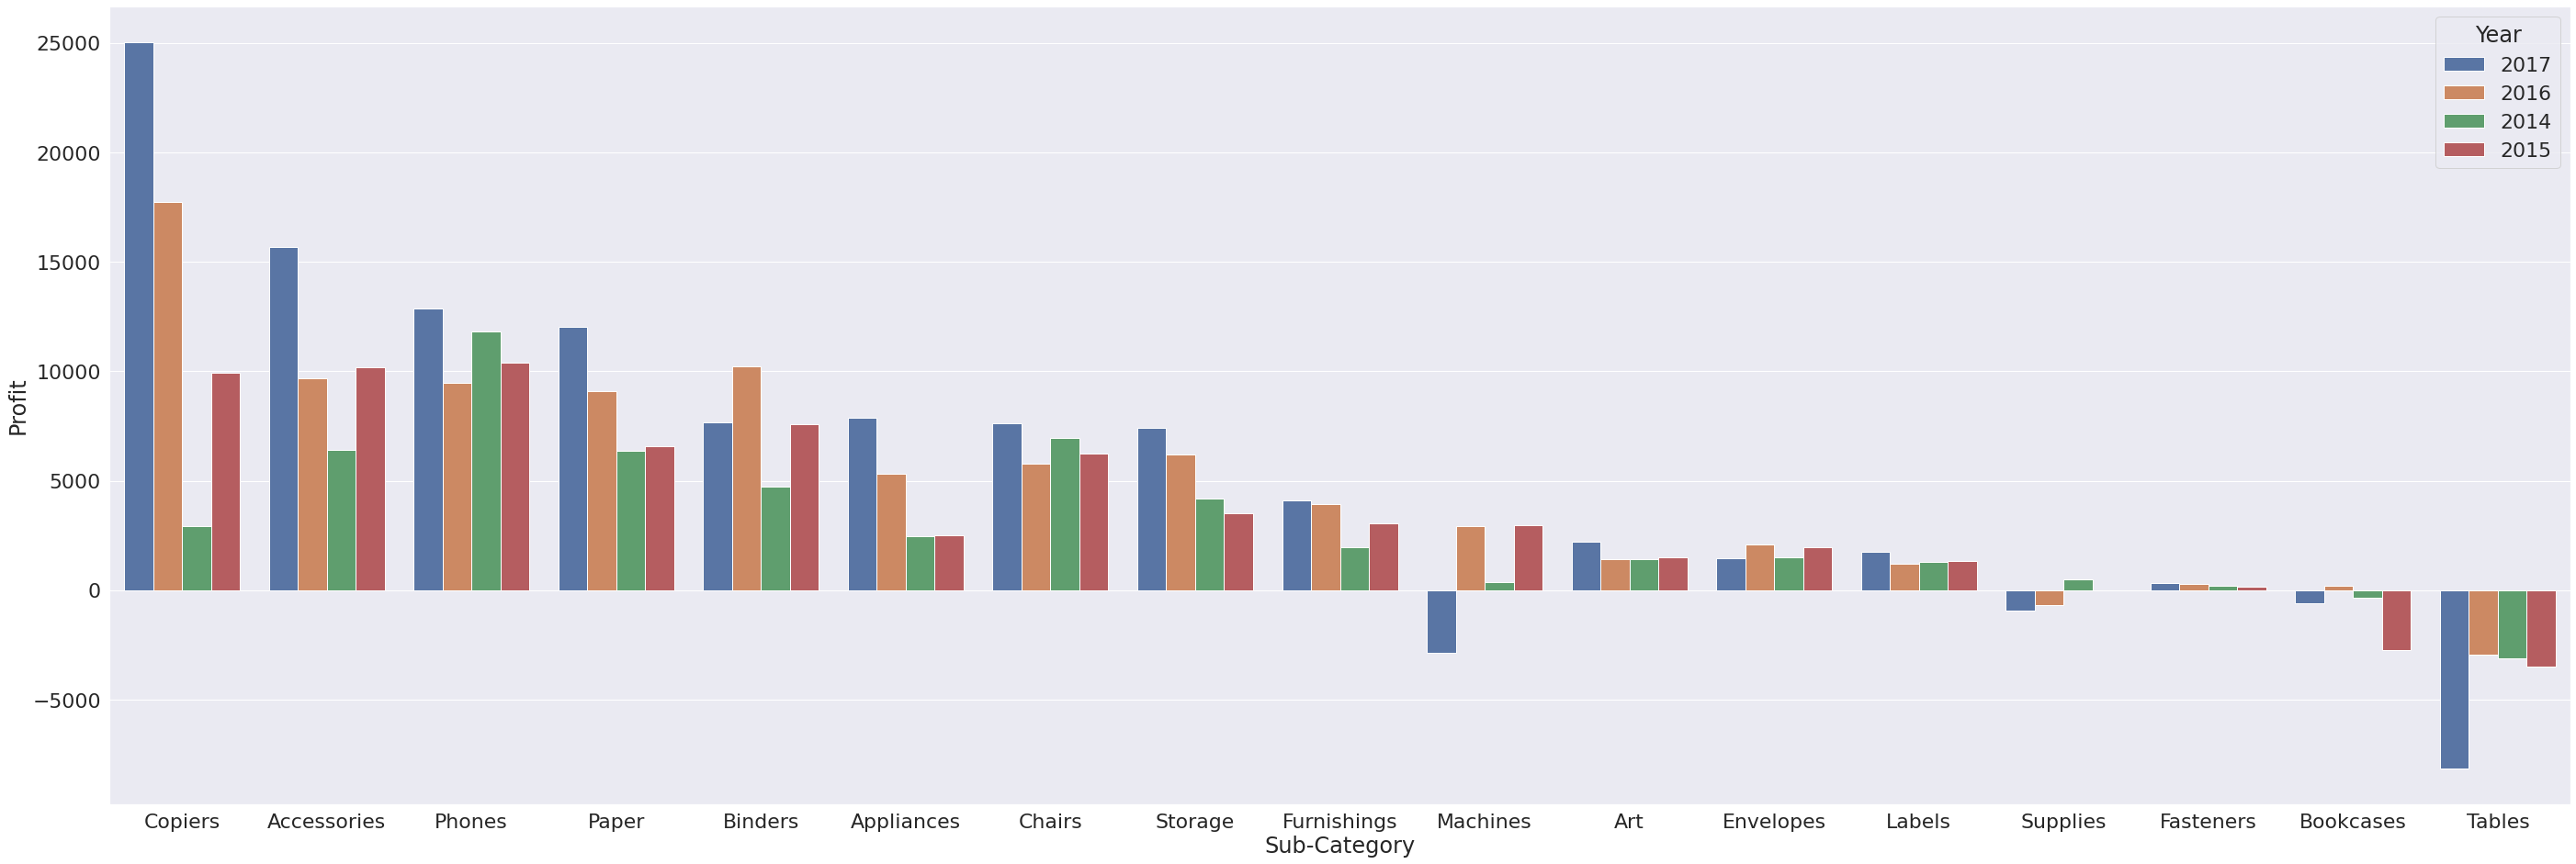

In [150]:
sns.set(font_scale = 2)
plt.figure(figsize=(48, 16))
sns.barplot(data=vendas_q2, y='Profit', x='Sub-Category', hue='Year')
plt.show()

**QUESTÃO 3**

In [196]:
vendas_q3 = vendas.filter(items=['Sales', 'Segment', 'Profit','Discount'])

In [197]:
vendas_q3

,Sales,Segment,Profit,Discount
0,261.9600,Consumer,41.9136,0.00
1,731.9400,Consumer,219.5820,0.00
2,14.6200,Corporate,6.8714,0.00
3,957.5775,Consumer,-383.0310,0.45
4,22.3680,Consumer,2.5164,0.20
...,...,...,...,...
9989,25.2480,Consumer,4.1028,0.20
9990,91.9600,Consumer,15.6332,0.00
9991,258.5760,Consumer,19.3932,0.20
9992,29.6000,Consumer,13.3200,0.00


In [198]:
vendas_q3['Valor de Performance'] = vendas_q3['Profit'] / ((vendas_q3['Sales']) - (vendas_q3['Discount']))

In [199]:
vendas_q3

,Sales,Segment,Profit,Discount,Valor de Performance
0,261.9600,Consumer,41.9136,0.00,0.160000
1,731.9400,Consumer,219.5820,0.00,0.300000
2,14.6200,Corporate,6.8714,0.00,0.470000
3,957.5775,Consumer,-383.0310,0.45,-0.400188
4,22.3680,Consumer,2.5164,0.20,0.113515
...,...,...,...,...,...
9989,25.2480,Consumer,4.1028,0.20,0.163798
9990,91.9600,Consumer,15.6332,0.00,0.170000
9991,258.5760,Consumer,19.3932,0.20,0.075058
9992,29.6000,Consumer,13.3200,0.00,0.450000


In [200]:
import numpy as np

In [201]:
vendas_q3['Classe de Performance'] = np.where((vendas_q3["Valor de Performance"] >= 0) & (vendas_q3["Valor de Performance"]<=0.1), 'E', np.where((vendas_q3["Valor de Performance"] > 0.1) & (vendas_q3["Valor de Performance"]<=0.15),'D',np.where((vendas_q3["Valor de Performance"] > 0.15) & (vendas_q3["Valor de Performance"]<=0.2),'C', np.where((vendas_q3["Valor de Performance"] > 0.2) & (vendas_q3["Valor de Performance"]<=0.25),'B',np.where((vendas_q3["Valor de Performance"] > 0.25) & (vendas_q3["Valor de Performance"]<=1.0),'A', False)))))

In [202]:
vendas_q3

,Sales,Segment,Profit,Discount,Valor de Performance,Classe de Performance
0,261.9600,Consumer,41.9136,0.00,0.160000,C
1,731.9400,Consumer,219.5820,0.00,0.300000,A
2,14.6200,Corporate,6.8714,0.00,0.470000,A
3,957.5775,Consumer,-383.0310,0.45,-0.400188,False
4,22.3680,Consumer,2.5164,0.20,0.113515,D
...,...,...,...,...,...,...
9989,25.2480,Consumer,4.1028,0.20,0.163798,C
9990,91.9600,Consumer,15.6332,0.00,0.170000,C
9991,258.5760,Consumer,19.3932,0.20,0.075058,E
9992,29.6000,Consumer,13.3200,0.00,0.450000,A


In [203]:
vendas_q3 = vendas_q3.filter(items=['Segment', 'Classe de Performance', 'Valor de Performance'])

In [204]:
vendas_q3

,Segment,Classe de Performance,Valor de Performance
0,Consumer,C,0.160000
1,Consumer,A,0.300000
2,Corporate,A,0.470000
3,Consumer,False,-0.400188
4,Consumer,D,0.113515
...,...,...,...
9989,Consumer,C,0.163798
9990,Consumer,C,0.170000
9991,Consumer,E,0.075058
9992,Consumer,A,0.450000


In [218]:
vendas_q3.value_counts('Classe de Performance')

Classe de Performance
A        5514
False    1871
E        1092
D         720
B         431
C         366
dtype: int64

OBS: Valores que não corresponderam a fórmula utilizada, foi considerado como "False"

In [221]:
vendas_q3.groupby(by=['Segment','Classe de Performance']).count()

Valor de Performance
Segment     Classe de Performance                      
Consumer    A                                      2820
            B                                       212
            C                                       186
            D                                       393
            E                                       577
            False                                  1003
Corporate   A                                      1674
            B                                       124
            C                                       114
            D                                       213
            E                                       339
            False                                   556
Home Office A                                      1020
            B                                        95
            C                                        66
            D                                       114
            E                                       176
            False                                   312